# JP Morgan Quant Challenge : ML
## Team KaushalArmy - Varun Vankineni, Sateesh Sivakoti
### IIT Madras

**(Caution- this file takes a long time to run as it involves grid search over parameters for cross validation)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read Train and Test Data (stored in current directory)
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
print('Shape of Train data:', train.shape)
print('Shape of Test data:', test.shape)

Shape of Train data: (7500, 9)
Shape of Test data: (2500, 8)


In [4]:
train.head()

,Name,Date of Birth,From,To,Flight Date,Flight Time,Booking Date,Class,Fare
0,Dr. FG61 FS88,1963-10-23,Mumbai,Kolkata,2016-11-04,13:50,2016-10-19,Business,14737.67
1,Dr. FG35 FS74,1981-10-09,Lucknow,Hyderabad,2016-09-19,18:30,2016-07-31,Economy,7621.71
2,Dr. MG45 MS99,1981-07-09,Lucknow,Patna,2016-05-27,10:50,2016-05-24,Economy,5655.81
3,Mr. MG93 MS13,1988-09-08,Mumbai,Lucknow,2016-07-24,14:40,2016-07-16,Economy,7436.94
4,Miss FG28 FS14,1994-11-18,Kolkata,Delhi,2016-12-21,10:20,2016-12-09,Economy,3282.54


* 'Name' seems interesting. We observe that the names of people with the designation Miss/ Mrs. begin with 'F'. The names of people with the title Mr. begin with 'M'. So the first letter of the name must be representative of the gender of the passenger.

In [5]:
train.describe()

,Fare
count,7500.000000
mean,8537.915123
std,6705.728347
min,1132.820000
25%,4278.107500
50%,6583.765000
75%,10547.300000
max,84141.470000


* There is only one numeric feature which is 'Fare'. So, the only numeric feature provided is the target variable.

In [6]:
train.isnull().sum()

Name             0
Date of Birth    0
From             0
To               0
Flight Date      0
Flight Time      0
Booking Date     0
Class            0
Fare             0
dtype: int64

* There are no missing values in the training data.

In [7]:
test.head()

,Name,Date of Birth,From,To,Flight Date,Flight Time,Booking Date,Class
0,Miss FG36 FS44,2004-06-26,Delhi,Lucknow,2016-04-04,19:40,2016-02-17,Economy
1,Dr. MG31 MS2,1961-04-30,Lucknow,Delhi,2016-03-08,17:50,2016-01-25,Economy
2,Dr. FG10 FS22,1966-08-28,Lucknow,Delhi,2016-01-11,13:30,2015-12-29,Business
3,Dr. FG18 FS12,1958-03-22,Lucknow,Mumbai,2016-10-13,13:20,2016-09-12,Economy
4,Miss FG14 FS33,2000-02-01,Chennai,Delhi,2016-09-24,17:50,2016-09-03,Economy


In [8]:
test.isnull().sum()

Name             0
Date of Birth    0
From             0
To               0
Flight Date      0
Flight Time      0
Booking Date     0
Class            0
dtype: int64

* There are no missing values in the test data.

In [9]:
for col in train.columns:
    print(col,':',train[col].dtype)

Name : object
Date of Birth : object
From : object
To : object
Flight Date : object
Flight Time : object
Booking Date : object
Class : object
Fare : float64


A few observations from the data provided:
* Vital information such as the distance of the flight, age, gender of the passenger, time in advance the booking was done is not provided directly. Intuitively, these would affect the fares.
* This info can be obtained by working with the data provided.
* For example info like the Gender and title (Dr. could be representative of affluent people) can be extracted from 'Name'.
* The data provided is clean, in the sense that there are no missing values and there are no mixed data types provided under any feature. 

### Gender and Title

In [10]:
# Extracting Gender and Title Information from the Name
train['Title'] = train.apply(lambda row: row[0].split(" ")[0], axis = 1)
train['Gender'] = train.apply(lambda row: row[0].split(" ")[1].split("G")[0], axis = 1)

test['Title'] = test.apply(lambda row: row[0].split(" ")[0], axis = 1)
test['Gender'] = test.apply(lambda row: row[0].split(" ")[1].split("G")[0], axis = 1)
train.head(3)

,Name,Date of Birth,From,To,Flight Date,Flight Time,Booking Date,Class,Fare,Title,Gender
0,Dr. FG61 FS88,1963-10-23,Mumbai,Kolkata,2016-11-04,13:50,2016-10-19,Business,14737.67,Dr.,F
1,Dr. FG35 FS74,1981-10-09,Lucknow,Hyderabad,2016-09-19,18:30,2016-07-31,Economy,7621.71,Dr.,F
2,Dr. MG45 MS99,1981-07-09,Lucknow,Patna,2016-05-27,10:50,2016-05-24,Economy,5655.81,Dr.,M


### Age

Age is computed by subtracting the year of Date of Birth from the Booking Date. So the Age at time of booking is found.

In [11]:
# Compute Age of the passenger at time of booking
train['Age'] = train.apply(lambda row: int(row[6].split("-")[0]) - int(row[1].split("-")[0]), axis = 1)
test['Age'] = test.apply(lambda row: int(row[6].split("-")[0]) - int(row[1].split("-")[0]), axis = 1)

In [12]:
train.head(3)

,Name,Date of Birth,From,To,Flight Date,Flight Time,Booking Date,Class,Fare,Title,Gender,Age
0,Dr. FG61 FS88,1963-10-23,Mumbai,Kolkata,2016-11-04,13:50,2016-10-19,Business,14737.67,Dr.,F,53
1,Dr. FG35 FS74,1981-10-09,Lucknow,Hyderabad,2016-09-19,18:30,2016-07-31,Economy,7621.71,Dr.,F,35
2,Dr. MG45 MS99,1981-07-09,Lucknow,Patna,2016-05-27,10:50,2016-05-24,Economy,5655.81,Dr.,M,35


After computing the age, the Date of Birth feature has no more information. It is redundant.

In [13]:
train.drop('Date of Birth', axis = 1, inplace = True)
test.drop('Date of Birth', axis = 1, inplace = True)

### From-To

This is a feature that combines the source and destination of the flights. It is a substitute for the distance since distance is not provided in the dataset.

In [14]:
# A feature combining cities the flight is between. It is a substitute for distance since distance is not provided.
train['From-To'] = train.apply(lambda row: row[1]+'-'+row[2], axis = 1)
test['From-To'] = test.apply(lambda row: row[1]+'-'+row[2], axis = 1)

In [15]:
train.head(3)

,Name,From,To,Flight Date,Flight Time,Booking Date,Class,Fare,Title,Gender,Age,From-To
0,Dr. FG61 FS88,Mumbai,Kolkata,2016-11-04,13:50,2016-10-19,Business,14737.67,Dr.,F,53,Mumbai-Kolkata
1,Dr. FG35 FS74,Lucknow,Hyderabad,2016-09-19,18:30,2016-07-31,Economy,7621.71,Dr.,F,35,Lucknow-Hyderabad
2,Dr. MG45 MS99,Lucknow,Patna,2016-05-27,10:50,2016-05-24,Economy,5655.81,Dr.,M,35,Lucknow-Patna


### Days to Journey

This feature contains information about the days in advance the booking was done.

In [16]:
# Time between the date of booking and the journey. (In days)
train['Flight Date'] = pd.to_datetime(train['Flight Date'])
train['Booking Date'] = pd.to_datetime(train['Booking Date'])
train['Days to Journey'] = train.apply(lambda row: (row[3] - row[5]).days, axis = 1)

test['Flight Date'] = pd.to_datetime(test['Flight Date'])
test['Booking Date'] = pd.to_datetime(test['Booking Date'])
test['Days to Journey'] = test.apply(lambda row: (row[3] - row[5]).days, axis = 1)

### Hour

This feature contains information about the hour at which the flight is scheduled. The minutes were removed and only hour was retained. ( In 24-hour system)

In [17]:
# Retaining the hour component of the Flight Time.
train['Hours'] = train.apply(lambda row: row[4].split(":")[0] , axis = 1)
test['Hours'] = test.apply(lambda row: row[4].split(":")[0] , axis = 1)

train.drop('Flight Time', axis = 1, inplace = True)
test.drop('Flight Time', axis = 1, inplace = True)

In [18]:
train.head(3)

,Name,From,To,Flight Date,Booking Date,Class,Fare,Title,Gender,Age,From-To,Days to Journey,Hours
0,Dr. FG61 FS88,Mumbai,Kolkata,2016-11-04,2016-10-19,Business,14737.67,Dr.,F,53,Mumbai-Kolkata,16,13
1,Dr. FG35 FS74,Lucknow,Hyderabad,2016-09-19,2016-07-31,Economy,7621.71,Dr.,F,35,Lucknow-Hyderabad,50,18
2,Dr. MG45 MS99,Lucknow,Patna,2016-05-27,2016-05-24,Economy,5655.81,Dr.,M,35,Lucknow-Patna,3,10


.....

..............

........................

## Inspecting the Variables

In [19]:
train.pivot_table(values = 'Fare', index = 'Class', aggfunc=np.mean)

,Fare
Class,
Business,15512.310308
Economy,6146.515520


* This could be a very useful feature as it clearly distinguishes in the average fare of an Economy and Business class ticket.
* Since this is a feature with only two possible values, it will be converted to a binary column.

In [20]:
# Since 'Class' is a binary feature, will replace the classes with numerical values.
train = train.replace(['Business', 'Economy'], [1, 0])
test = test.replace(['Business', 'Economy'], [1, 0])

In [21]:
train.head(3)

,Name,From,To,Flight Date,Booking Date,Class,Fare,Title,Gender,Age,From-To,Days to Journey,Hours
0,Dr. FG61 FS88,Mumbai,Kolkata,2016-11-04,2016-10-19,1,14737.67,Dr.,F,53,Mumbai-Kolkata,16,13
1,Dr. FG35 FS74,Lucknow,Hyderabad,2016-09-19,2016-07-31,0,7621.71,Dr.,F,35,Lucknow-Hyderabad,50,18
2,Dr. MG45 MS99,Lucknow,Patna,2016-05-27,2016-05-24,0,5655.81,Dr.,M,35,Lucknow-Patna,3,10


.......................

In [22]:
train.pivot_table(values = 'Fare', index = 'Hours', aggfunc=np.mean)

,Fare
Hours,
00,8582.972557
01,8335.829349
02,8818.666301
03,8181.519581
04,8554.397044
05,8561.208280
06,7769.798471
07,8452.496771
08,8984.878076


* There is not a lot to infer from this pivot table. The hour feature does not explain the Fare in this format.

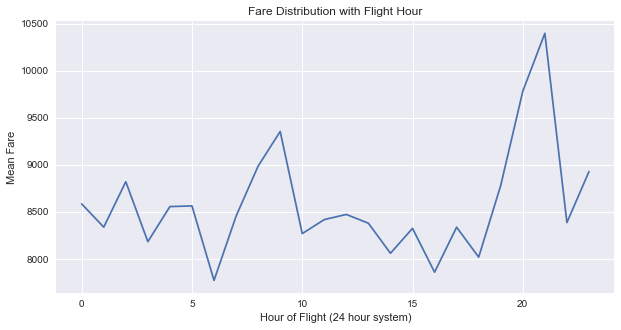

In [23]:
plt.figure(figsize=(10,5))
plt.plot(train.pivot_table(values = 'Fare', index = 'Hours', aggfunc=np.mean).values)
plt.title('Fare Distribution with Flight Hour')
plt.xlabel('Hour of Flight (24 hour system)')
plt.ylabel('Mean Fare')
plt.show()

* The 'Hour' of flight data can be made better use of by seperating the peak hours.
* This is done by creating bins for hours which have similar average fares. 
* The bins to be made have been identified from the plot and can be seen in the hour_bins function defined below.

In [24]:
def hour_bins(hour):
    '''Function to divide Flight Times into Windows based on observed average fares'''
    if hour in ['00','01','02','03','04','05','06', '07']:
        return '00-07'
    elif hour in ['08','09']:
        return '08-09'
    elif hour in ['10','11','12','13','14','15','16','17','18']:
        return '10-18'
    elif hour in ['19','20','21','22','23']:
        return '19-23'

In [25]:
# Creating bins for hour of flight.
train['Hour'] = train.apply(lambda row: hour_bins(row[12]), axis = 1)
test['Hour'] = test.apply(lambda row: hour_bins(row[11]), axis = 1)

In [26]:
train.pivot_table(values = 'Fare', index = 'Hour', aggfunc = np.mean)

,Fare
Hour,
00-07,8408.515392
08-09,9162.116722
10-18,8210.568992
19-23,9242.031446


* Here we can see a better variance in the average fares with respect to flight hour.
* Hence will drop the 'Hours' feature

In [27]:
train.drop('Hours', axis = 1, inplace = True)
test.drop('Hours', axis = 1, inplace = True)

.......................................

In [28]:
train.pivot_table(values = 'Fare', index = 'Title', aggfunc=np.mean)

,Fare
Title,
Dr.,10808.869488
Miss,6549.360172
Mr.,6862.627500
Mrs.,7285.904559


* We observe that generally, Dr.'s pay (don't mind paying) a higher fare.
* We will leave this feature like this since it explains the 'Fare' well.

...........................

In [29]:
train.pivot_table(values = 'Fare', index = 'Gender', aggfunc=np.mean)

,Fare
Gender,
F,8269.375797
M,8800.645896


* Gender can take only two possible values (inferred from the data) and hence will convert to a binary feature.

In [30]:
train = train.replace(['M', 'F'], [1, 0])
test = test.replace(['M', 'F'], [1, 0])

### Correlations

In [31]:
train.drop(['Class', 'Gender'], axis = 1).corr()

,Fare,Age,Days to Journey
Fare,1.000000,0.105489,-0.210873
Age,0.105489,1.000000,0.010337
Days to Journey,-0.210873,0.010337,1.000000


* There are no strong correlations among the variables indicating the absence of any **linear relations** between the numerical features.
* However we can infer that an increase the duration between booking and journey decreases the fare, which is what we expect.

....................

Age is a continuos variable and clearly there is almost no correlation between age and the fare as seen above. We will try to   extract more information from this feature.

In [32]:
age_table = train.pivot_table(index = 'Age', values = 'Fare', aggfunc=np.mean)

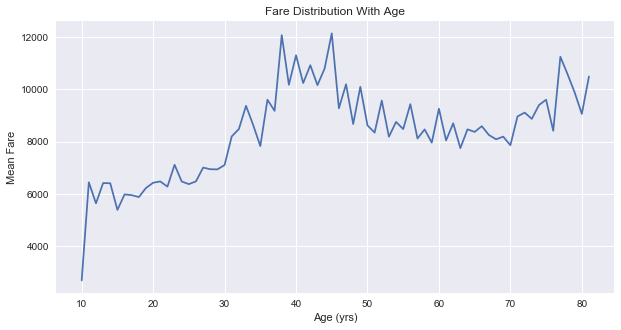

In [33]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(10,82),age_table.values)
plt.title('Fare Distribution With Age')
plt.xlabel('Age (yrs)')
plt.ylabel('Mean Fare')
plt.show()

* The first point (corresponding to age 10 yrs) is an anomaly.
* There is no clear trend. However, the plot does not have any sharp increases or decreases. If we consider small intervals and average the fare in that region, we will get a reasonable estimate of the fare for a particular age group.
* Here, we have decided to divide age into 10 year intervals starting from (10-19yrs).

In [34]:
# Creating 10 year bins for age.
train['Age_bin'] = train.apply(lambda row: str(int(row[9]/10)*10) +'-'+str(int(row[9]/10)*10 + 9)\
                               , axis = 1)

test['Age_bin'] = test.apply(lambda row: str(int(row[8]/10)*10) +'-'+str(int(row[8]/10)*10 + 9)\
                               , axis = 1)
train.head(3)

,Name,From,To,Flight Date,Booking Date,Class,Fare,Title,Gender,Age,From-To,Days to Journey,Hour,Age_bin
0,Dr. FG61 FS88,Mumbai,Kolkata,2016-11-04,2016-10-19,1,14737.67,Dr.,0,53,Mumbai-Kolkata,16,10-18,50-59
1,Dr. FG35 FS74,Lucknow,Hyderabad,2016-09-19,2016-07-31,0,7621.71,Dr.,0,35,Lucknow-Hyderabad,50,10-18,30-39
2,Dr. MG45 MS99,Lucknow,Patna,2016-05-27,2016-05-24,0,5655.81,Dr.,1,35,Lucknow-Patna,3,10-18,30-39


In [35]:
train.pivot_table(values = 'Fare', index = 'Age_bin', aggfunc=np.mean)

,Fare
Age_bin,
10-19,6009.717471
20-29,6679.785179
30-39,9020.559052
40-49,10396.943256
50-59,8586.590561
60-69,8355.987782
70-79,9216.429006
80-89,9804.168241


* We see that binning the age helps in explaining the data better. So, we will keep the Age_bin as a categorical feature.

...............................................

In [36]:
train.pivot_table(values = 'Fare', index = 'From-To', aggfunc=np.mean)

,Fare
From-To,
Chennai-Delhi,13126.233963
Chennai-Hyderabad,3940.181447
Chennai-Kolkata,8317.503469
Chennai-Lucknow,14953.544068
Chennai-Mumbai,8835.886464
Chennai-Patna,15362.816429
Delhi-Chennai,11822.794815
Delhi-Hyderabad,11822.770213
Delhi-Kolkata,6390.889253


* We see a pretty good variance of fares in the From-To feature. Hence we will keep this feature.

.................................

#### THE ABOVE CELL WAS USED TO FIND OUT IF THERE ARE PEOPLE TRAVELLING TOGETHER IN THE DATA. NO GROUPS WERE FOUND. THE CODE WAS MADE INACTIVE SINCE IT TAKES A LONG TIME TO RUN. IT CAN STILL BE RUN BY CONVERTING THE CELL TO 'CODE'

In [37]:
# Dropping Unnecessary Features
train.drop(['Age','Flight Date', 'Booking Date', 'Name'], axis = 1, inplace = True)
test.drop(['Age', 'Flight Date', 'Booking Date', 'Name'], axis = 1, inplace = True)

...............................

...................................................

.................................................................

In [38]:
train = train.astype({'From':'category', 'To':'category', 'Title':'category',\
                        'From-To':'category', 'Hour':'category', 'Age_bin':'category'})

test = test.astype({'From':'category', 'To':'category', 'Title':'category',\
                       'From-To':'category', 'Hour':'category', 'Age_bin':'category'})

In [39]:
# Preparing data to be fed to a predictive model
train_Y = train['Fare']
train_X = train.drop('Fare', axis = 1)
test_X = test

## Cross Validation

* The absence of any correlation between the numerical variables rules out the possibility of using a linear model.
* The data mostly consists of categorical features. We observed that the categories in the features contain information about the Fare from the Pivot tables drawn earlier. 
* So we will use tree based classifiers, namely the Random Forest Regressor and the Gradient Boosting Regressor.
* We will identify the best model among these two and tune the hyper-parameters to maximise the R2 score on Cross Validation.
* Then the identified model and hyper parameters will be used to make the final predictions.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

C:\Program Files\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


* The cross validation datasets are created by randomly sampling the training datasets.
* The random_state has been set to replicate results over multiple runs.

In [42]:
CVtrain_X, CVtest_X, CVtrain_Y, CVtest_Y = train_test_split(train_X, train_Y, test_size = 0.2, 
                                                           random_state = 42)
CVtrain_X, CVtest_X = pd.get_dummies(CVtrain_X), pd.get_dummies(CVtest_X)

In [43]:
def evaluate_models(number_of_est, maximum_depth, models, train_X, test_X):    
    '''Function to evaluate the performance of a tree based model (based on R2 score), over a grid of
        number of estimators and maximum depth. Function takes in choice of model, array of n_estimators, 
        array of max_depth and training and testing sets'''
    for model_choice in models:
        for n_est in number_of_est:
            for max_d in maximum_depth:
                model = model_choice(n_estimators=n_est, max_depth=max_d, random_state = 42)
                model.fit(train_X, CVtrain_Y)
                CVpred = model.predict(test_X)

                r2 = r2_score(CVtest_Y, CVpred)
                print(model_choice,',Estimators:',n_est,',Max_Depth:',max_d,',R2:', r2)

In [44]:
models = [RandomForestRegressor, GradientBoostingRegressor]
number_of_est = [20, 30, 40, 50, 60]
maximum_depth = [5, 10, 15, 20, 25]
evaluate_models(number_of_est, maximum_depth, models, CVtrain_X, CVtest_X)

<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 20 ,Max_Depth: 5 ,R2: 0.6175037721138807
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 20 ,Max_Depth: 10 ,R2: 0.737175585792021
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 20 ,Max_Depth: 15 ,R2: 0.7752732609899174
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 20 ,Max_Depth: 20 ,R2: 0.7918603551862671
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 20 ,Max_Depth: 25 ,R2: 0.7914300666284275
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 30 ,Max_Depth: 5 ,R2: 0.6213119493645932
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 30 ,Max_Depth: 10 ,R2: 0.7430858706318666
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 30 ,Max_Depth: 15 ,R2: 0.7816427394123021
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 30 ,Max_Depth: 20 ,R2: 0.7977413838764924
<cla

** We see that the Gradient Boosting Regressor obtains higher scores than the Random Forest Regressor. Hence we will choose the GBRegressor and tune the hyper parameters to maximise the R2 score.**

In [45]:
number_of_est = [65,70,75]
maximum_depth = [8,10]
models = [GradientBoostingRegressor]
evaluate_models(number_of_est, maximum_depth, models, CVtrain_X, CVtest_X)

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 65 ,Max_Depth: 8 ,R2: 0.8236299912189717
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 65 ,Max_Depth: 10 ,R2: 0.8182945488292872
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 70 ,Max_Depth: 8 ,R2: 0.8249347779051557
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 70 ,Max_Depth: 10 ,R2: 0.8190101345833212
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 75 ,Max_Depth: 8 ,R2: 0.8259107619844608
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 75 ,Max_Depth: 10 ,R2: 0.8191072779387691


** Max_depth of 8 gets the highest scores consistently and is also increasing with number of estimators. Hence we will limit our max_depth to 8 and keep searching for the ideal number of estimators.**

In [46]:
number_of_est = [80, 90, 100, 110, 120, 130, 140]
maximum_depth = [8]
models = [GradientBoostingRegressor]
evaluate_models(number_of_est, maximum_depth, models, CVtrain_X, CVtest_X)

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 80 ,Max_Depth: 8 ,R2: 0.8266502634204327
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 90 ,Max_Depth: 8 ,R2: 0.8280096429159756
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 100 ,Max_Depth: 8 ,R2: 0.8284453754424691
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 110 ,Max_Depth: 8 ,R2: 0.8286342635246974
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 120 ,Max_Depth: 8 ,R2: 0.8285463094496172
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 130 ,Max_Depth: 8 ,R2: 0.8286207943291359
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 140 ,Max_Depth: 8 ,R2: 0.828215056703738


In [47]:
number_of_est = [105]
maximum_depth = [8]
models = [GradientBoostingRegressor]
evaluate_models(number_of_est, maximum_depth, models, CVtrain_X, CVtest_X)

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> ,Estimators: 105 ,Max_Depth: 8 ,R2: 0.8286125233758286


**110 estimators obtains the highest R2 CV score. Hence we will use n_estimators = 110 and max_depth = 8 for our final model**

In [48]:
model = GradientBoostingRegressor(n_estimators=110, max_depth=8, random_state=42)
model.fit(CVtrain_X, CVtrain_Y)
CVpred = model.predict(CVtest_X)
r2 = r2_score(CVtest_Y, CVpred)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = CVtrain_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [49]:
r2

0.8286342635246974

** R2 CV score - 0.8286**

In [50]:
feature_importances.head(20)

,importance
Days to Journey,0.219333
Class,0.160542
Title_Dr.,0.050888
Gender,0.022710
Age_bin_40-49,0.022341
Age_bin_30-39,0.021766
Age_bin_70-79,0.019343
Age_bin_60-69,0.018905
Hour_19-23,0.017259
Hour_10-18,0.015815


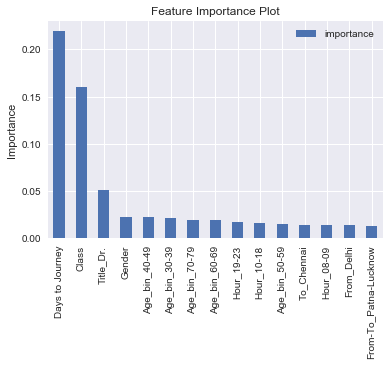

In [57]:
feature_importances.iloc[:15,:].plot.bar()
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

* According to our model, the Days to Journey is the most important feature. This is logical.

# Predictions

In [51]:
train_X, test_X = pd.get_dummies(train_X), pd.get_dummies(test_X)
fin_model = GradientBoostingRegressor(n_estimators=105, max_depth=8)
fin_model.fit(train_X, train_Y)
Predictions = fin_model.predict(test_X)

Predictions

array([ 1956.58112122,  3087.80361623, 12192.94087532, ...,
        6575.20601561,  8650.86555394, 10719.94805594])